* **1. GET STARTED** 
 * 1.1. LOAD LIBARIES 
 * 1.2. LOAD DATA  
  
  
* **2. EDA** 
 * 2.1. CLEAN COLUMN NAMES AND CHECK TYPES 
 * 2.2. CHECK NaN VALUES 
 * 2.3. CHECK BASIC STATISTICS 
 * 2.4. CHECK UNIQUE VALUES
 * 2.5. EXPLORE NUMERICAL DATA
 * 2.6. EXPLORE CATEGORICAL DATA  
 
 
* **3. DATA PROCESSING + FEATURE ENGINEERING**
 * 3.1. CORRELATION NUMERICAL COLUMNS
 * 3.2. CORRELATION CATEGORICAL COLUMNS
 * 3.3. APPLY BOXCOX TRANSFORMATION
 * 3.4. DEAL WITH OUTLIERS
 * 3.5. TRAIN / TEST SPLIT 
 * 3.6. STANDARDIZE NUMERICAL COLUMNS 
 * 3.7. ENDCODE CATEGORICAL COLUMNS
 * 3.8. CONCAT ENDCODED CATEGORICAL + STANDARDUZE NUMERCIAL DATA  
 
 
* **4. MODEL EVALUATION**
 * 4.1. KNEIGHBORS CLASSIFIER 
 * 4.2. KNEIGHBORS CLASSIFIER + SMOTE
 * 4.3. LOGISTIC REGRESSION
 * 4.4. LOGISTIC REGRESSION + WEIGHTS  
 
 
* **5. MODEL CONCLUSIONS**  


* **6. WRAP UP AND RECOMMENDED NEXT STEPS**

## 1. GET STARTED

### 1.1. LOAD LIBARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from helper_EDA_model import *

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn import metrics
from sklearn.utils import class_weight

### 1.1. LOAD DATA

Loading the scraped and cleaned data. Drop the url because there is no added value in this. Item number is wokring as a ID for each product and is set as the index. 

In [2]:
pd.set_option('display.max_columns', None)
df_read = pd.read_csv("df_cleaned.csv")
df = df_read.drop(['url'], axis = 1)
df.head()

,item_nb,brand,product,size,price,category,type,scope,age,rating,number_rating,char_regenierend,char_pflegend,char_feuchtigkeitsspendend,char_reinigend,char_schützend,char_anti-aging,char_straffend,char_beruhigend,char_festigend,char_langhaftend,char_stärkend,char_revitalisierend,char_Anti-Pollution,char_reparierend,eff_glanzverleihend,eff_formend,eff_verlängernd,eff_glättend,eff_farberhaltend,eff_aufhellend,eff_verdichtend,awa_parabenfrei,awa_sulfatfrei,awa_amoniakfrei,awa_acetonfrei,awa_laktosefrei,awa_glutenfrei,awa_paraffinfrei,awa_für sensible Haut geeignet,awa_mikroplastik-frei,awa_silikonfrei,awa_vegan,awa_komedogen-frei,awa_palmöl-frei,awa_farbstoff-frei,awa_Clean Beauty,awa_ohne ölige Inhaltsstoffe,awa_alkoholfrei,awa_parfümfrei,awa_konservierungsstoff-frei
0,789806,st.tropez,Prep & MaintainBody Polish,200.0,15.990000,Körper,Peeling,Körper,100,5.0,4.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,83983,st.tropez,Gradual TanWatermelon Infusion Everyday Moistu...,200.0,20.990000,Gesicht,Sonnenprodukte,Körper,100,4.0,6.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0
2,628593,coco & eve,Glow FigureBody Moisture Whip,212.0,41.683252,Körper,Körperpflege,Körper,100,4.0,3.000000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107161,aesop,Rind Concentrate Body Balm,100.0,41.683252,Körper,Körperpflege,Körper,100,4.5,35.031199,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,27613,NaN,Reiseset,100.0,41.683252,Körper,Geschenkset,Körper,100,5.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df["price"] = df["price"].apply(lambda x: round(x,2))
df["rating"] = df["rating"].apply(lambda x: round(x,2))
df["number_rating"] = df["number_rating"].apply(lambda x: round(x,2))

## 2. EXPLORE THE DATA

### 2.2. CLEAN COLUMN NAMES AND CHECK TYPES

In [4]:
get_started(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47716 entries, 0 to 47715
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   item_nb                         47716 non-null  object 
 1   brand                           38196 non-null  object 
 2   product                         47716 non-null  object 
 3   size                            47716 non-null  float64
 4   price                           47716 non-null  float64
 5   category                        47716 non-null  object 
 6   type                            47716 non-null  object 
 7   scope                           47716 non-null  object 
 8   age                             47716 non-null  int64  
 9   rating                          47716 non-null  float64
 10  number_rating                   47716 non-null  float64
 11  char_regenierend                47716 non-null  int64  
 12  char_pflegend                   

### 2.2. CHECK NaN VALUES 

In [5]:
percantage_null(df)

                                percentage
brand                            19.951379
eff_formend                       0.000000
eff_verlängernd                   0.000000
eff_glättend                      0.000000
eff_farberhaltend                 0.000000
eff_aufhellend                    0.000000
eff_verdichtend                   0.000000
awa_parabenfrei                   0.000000
awa_sulfatfrei                    0.000000
awa_amoniakfrei                   0.000000
awa_acetonfrei                    0.000000
awa_laktosefrei                   0.000000
awa_glutenfrei                    0.000000
item_nb                           0.000000
awa_für_sensible_haut_geeignet    0.000000
awa_mikroplastik-frei             0.000000
awa_silikonfrei                   0.000000
awa_vegan                         0.000000
awa_komedogen-frei                0.000000
awa_palmöl-frei                   0.000000
awa_farbstoff-frei                0.000000
awa_clean_beauty                  0.000000
awa_ohne_öl

Replacing the NaN values in the 'brand' column by the most frequent value.

In [6]:
df["brand"] = df["brand"].fillna(df["brand"].mode().iloc[0])

### 2.3. CHECK BASIC STATISTICS 

In [7]:
df.describe().apply(lambda x: round(x,2))

,size,price,age,rating,number_rating,char_regenierend,char_pflegend,char_feuchtigkeitsspendend,char_reinigend,char_schützend,char_anti-aging,char_straffend,char_beruhigend,char_festigend,char_langhaftend,char_stärkend,char_revitalisierend,char_anti-pollution,char_reparierend,eff_glanzverleihend,eff_formend,eff_verlängernd,eff_glättend,eff_farberhaltend,eff_aufhellend,eff_verdichtend,awa_parabenfrei,awa_sulfatfrei,awa_amoniakfrei,awa_acetonfrei,awa_laktosefrei,awa_glutenfrei,awa_paraffinfrei,awa_für_sensible_haut_geeignet,awa_mikroplastik-frei,awa_silikonfrei,awa_vegan,awa_komedogen-frei,awa_palmöl-frei,awa_farbstoff-frei,awa_clean_beauty,awa_ohne_ölige_inhaltsstoffe,awa_alkoholfrei,awa_parfümfrei,awa_konservierungsstoff-frei
count,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.00,47716.0,47716.00,47716.0,47716.00,47716.00,47716.00
mean,112.47,41.68,94.07,4.44,35.03,0.00,0.17,0.17,0.07,0.06,0.05,0.02,0.04,0.02,0.04,0.03,0.02,0.02,0.02,0.04,0.01,0.01,0.05,0.01,0.01,0.01,0.23,0.21,0.19,0.16,0.16,0.15,0.16,0.15,0.15,0.14,0.12,0.10,0.08,0.1,0.05,0.1,0.11,0.04,0.05
std,234.68,56.71,20.68,0.53,158.18,0.01,0.37,0.38,0.25,0.23,0.22,0.15,0.20,0.15,0.21,0.16,0.13,0.13,0.13,0.21,0.10,0.08,0.22,0.12,0.11,0.09,0.42,0.41,0.39,0.37,0.37,0.36,0.37,0.36,0.36,0.35,0.33,0.31,0.27,0.3,0.22,0.3,0.31,0.19,0.22
min,0.00,0.49,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00
25%,50.00,13.99,100.00,4.50,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00
50%,100.00,24.99,100.00,4.50,35.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00
75%,112.47,42.99,100.00,4.50,35.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00
max,9000.00,998.99,100.00,5.00,16774.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.00,1.00,1.00


- A point to dicuss is that the number of ratings reaching from 1 to +16000. For the next project it would be better to scrape more data with similar number of ratings to have a good valuation basis. 

- When the mean of the binary columns is very low this could be a hint for very low number of 1 values. It's important to have a look into the distribution on a later point. 

### 2.4. CHECK UNIQUE VALUES

In [8]:
unique_val(df.drop(['item_nb', 'number_rating', 'product', 'size', 'price'], axis=1))


brand
['st.tropez' 'coco & eve' 'aesop' ... 'percy & reed' 'styledry' 'mistik'] 


category
['Körper' 'Gesicht' 'Make-up' 'Parfum' 'Haare' 'Home & Lifestyle'] 


type
['Peeling' 'Sonnenprodukte' 'Körperpflege' 'Geschenkset' 'Creme'
 'Bodylotion' 'Seife' 'Haarshampoo' 'Duschgel' 'Handpflege' 'Haarprodukt'
 'GesichtsSpayWasser' 'Fusspflege' 'Lifestyle-Accessoires' 'Beautytools'
 'Badezusatz' 'SerumÖle' 'Enthaarungsprodukt' 'Deodorant' 'Make-up Set'
 'Gesichtsreinigung' 'Mode-Accessoires' 'Eau de Toilette' 'Gesichtspflege'
 'Lippenbalm' 'Pinsel' 'Maske' 'Bartpflege' 'Eau de Parfum'
 'Gesichtscreme' 'Augenpflege' 'Foundation' 'Nagellack'
 'Anti-Aging Pflege' 'Künstliche Wimpern' 'Lippenpflege' 'Parfum'
 'Lippenstift' 'Highlighter' 'Concealer' 'Mascara' 'Eau de Cologne'
 'PuderRougeBronzer' 'Schmuck' 'AugenbrauenWimpernstyling' 'Lidschatten'
 'KajalEyeliner' 'Lipgloss' 'Primer'] 


scope
['Körper' 'Hals' 'Everywhere' 'Hände' 'Haare' 'Gesicht' 'Mund' 'Nägel'
 'Augenbrauen' 'Augen' 'Wimpern'

-  There are a lot of brands. For further exploration the brands with a count under 200 get summarized under one value.

In [9]:
len(df['brand'].unique())

1209

In [10]:
pd.set_option('display.max_rows', None)
df['brand'].value_counts()

l´oréal paris                      9980
douglas                             375
soho                                375
artdeco                             350
nivea                               323
mac                                 301
hugo boss                           285
michael kors                        270
mühle                               266
chanel                              254
wella professionals                 248
lancôme                             240
biotherm                            233
clinique                            230
jo malone london                    224
clarins                             221
estée lauder                        218
essence                             217
erbe                                216
schwarzkopf professional            212
isadora                             211
tom ford                            197
catrice                             196
babor                               192
nyx professional makeup             191


In [11]:
brand_all = df["brand"].to_list()
top_brands = ["artdeco", "douglas", "hugo boss", "mac", "michael kors", "l´oréal paris", "nivea", "lancôme", "chanel", 
              "essence", "clarins", "soho", 'mühle', 'essence', 'schwarzkopf professional', 'isadora']
new_brand = []

for i in brand_all: 
    if i in top_brands: 
        new_brand.append(i)
    else: 
        new_brand.append("Other_brand")

df["brand"] = new_brand
len(df['brand'].unique())

16

### 2.5. EXPLORE NUMERICAL DATA

In [12]:
num = df.select_dtypes(include=np.number)
num.head()

,size,price,age,rating,number_rating,char_regenierend,char_pflegend,char_feuchtigkeitsspendend,char_reinigend,char_schützend,char_anti-aging,char_straffend,char_beruhigend,char_festigend,char_langhaftend,char_stärkend,char_revitalisierend,char_anti-pollution,char_reparierend,eff_glanzverleihend,eff_formend,eff_verlängernd,eff_glättend,eff_farberhaltend,eff_aufhellend,eff_verdichtend,awa_parabenfrei,awa_sulfatfrei,awa_amoniakfrei,awa_acetonfrei,awa_laktosefrei,awa_glutenfrei,awa_paraffinfrei,awa_für_sensible_haut_geeignet,awa_mikroplastik-frei,awa_silikonfrei,awa_vegan,awa_komedogen-frei,awa_palmöl-frei,awa_farbstoff-frei,awa_clean_beauty,awa_ohne_ölige_inhaltsstoffe,awa_alkoholfrei,awa_parfümfrei,awa_konservierungsstoff-frei
0,200.0,15.99,100,5.0,4.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,200.0,20.99,100,4.0,6.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0
2,212.0,41.68,100,4.0,3.00,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100.0,41.68,100,4.5,35.03,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,100.0,41.68,100,5.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
print_highest_smallest_value(df,['price', 'size', 'number_rating'], 5)

10222    998.99
44360    974.59
44428    974.59
40375    949.00
4977     916.00
Name: price, dtype: float64
28453    0.49
25646    0.79
33844    0.79
17131    0.95
2744     0.99
Name: price, dtype: float64

945      9000.0
976      9000.0
4923     9000.0
33578    9000.0
41350    9000.0
Name: size, dtype: float64
24349    0.00
31477    0.01
28024    0.04
27017    0.05
28494    0.05
Name: size, dtype: float64

27663    16774.0
26351    15984.0
26843    15768.0
26485    12456.0
12797     3559.0
Name: number_rating, dtype: float64
4     1.0
17    1.0
32    1.0
44    1.0
48    1.0
Name: number_rating, dtype: float64



- There are binary columns. These columns will be handled as categorical data for further exploration 
- The rating column only contains 8 different values. Will also handled as categrocial column. 

In [14]:
bin_columns = ['rating', 'char_regenierend',
       'char_pflegend', 'char_feuchtigkeitsspendend', 'char_reinigend',
       'char_schützend', 'char_anti-aging', 'char_straffend',
       'char_beruhigend', 'char_festigend', 'char_langhaftend',
       'char_stärkend', 'char_revitalisierend', 'char_anti-pollution',
       'char_reparierend', 'eff_glanzverleihend', 'eff_formend',
       'eff_verlängernd', 'eff_glättend', 'eff_farberhaltend',
       'eff_aufhellend', 'eff_verdichtend', 'awa_parabenfrei',
       'awa_sulfatfrei', 'awa_amoniakfrei', 'awa_acetonfrei',
       'awa_laktosefrei', 'awa_glutenfrei', 'awa_paraffinfrei',
       'awa_für_sensible_haut_geeignet', 'awa_mikroplastik-frei',
       'awa_silikonfrei', 'awa_vegan', 'awa_komedogen-frei', 'awa_palmöl-frei',
       'awa_farbstoff-frei', 'awa_clean_beauty',
       'awa_ohne_ölige_inhaltsstoffe', 'awa_alkoholfrei', 'awa_parfümfrei',
       'awa_konservierungsstoff-frei']

df[bin_columns] = df[bin_columns].astype('object')

In [15]:
num = df.select_dtypes(include=np.number)
num.head()

,size,price,age,number_rating
0,200.0,15.99,100,4.00
1,200.0,20.99,100,6.00
2,212.0,41.68,100,3.00
3,100.0,41.68,100,35.03
4,100.0,41.68,100,1.00


<Figure size 432x288 with 0 Axes>

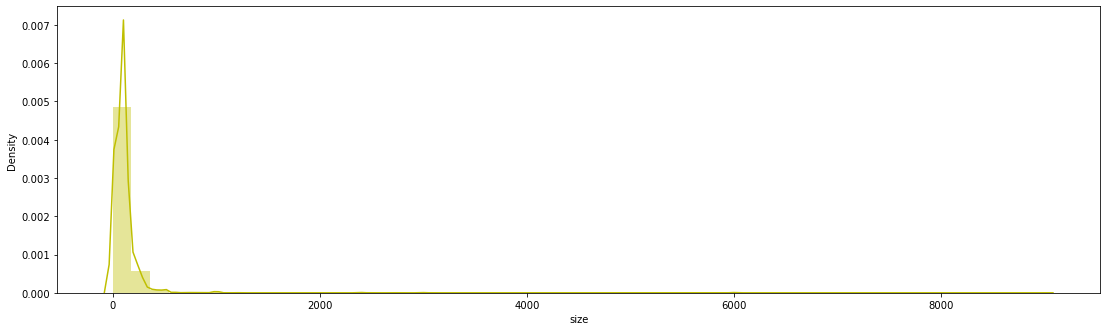

<Figure size 432x288 with 0 Axes>

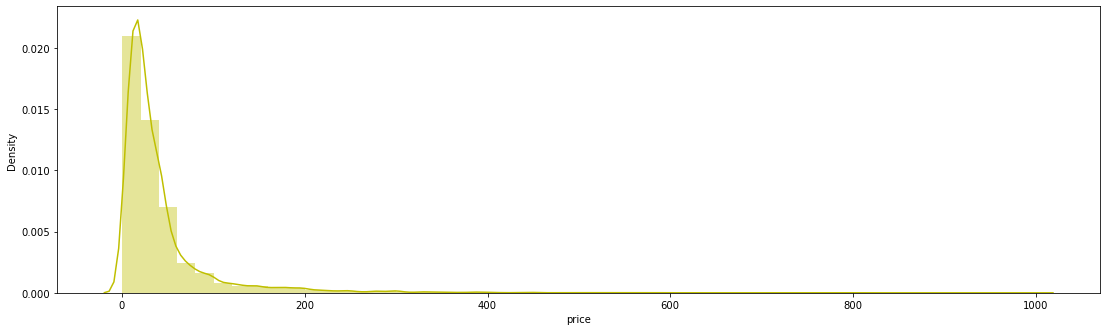

<Figure size 432x288 with 0 Axes>

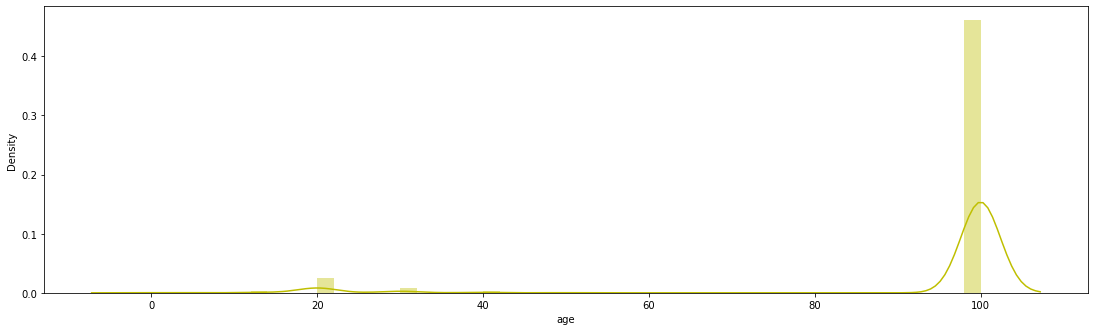

<Figure size 432x288 with 0 Axes>

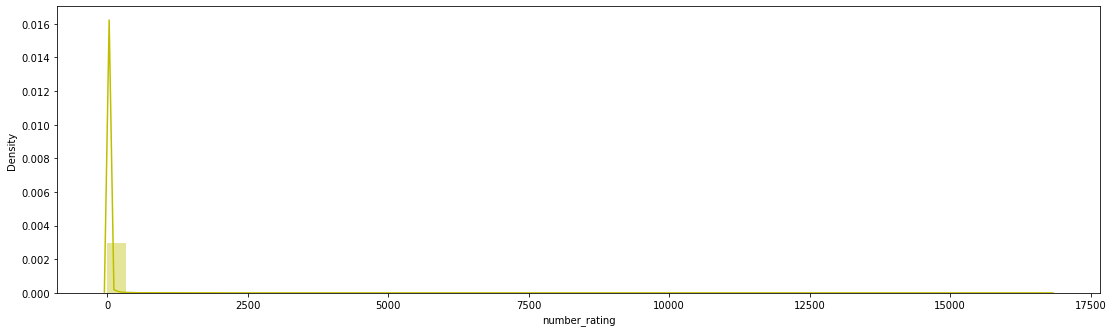

In [16]:
for i in num.columns:
    plt.figure()
    fig, ax = plt.subplots()
    fig.set_size_inches(18.7, 5.27)
    sns.distplot(num[i], color="y")

#### Findings in numerical columns

- There are a lot of numerical columns that are bette handled as categorical columns. 
- All numercial data shows wide distribution with massive ups. For this I have to normalize the distribution and cut the outliers. 
- There seems to be a lot of products with only a few number of ratings. Would be a more solid data base if we had a ideal dataset with same number of ratings for each product. 

### 2.6. EXPLORE CATEGORICAL DATA

In [17]:
cat = df.select_dtypes(include=np.object)
cat.head()

,item_nb,brand,product,category,type,scope,rating,char_regenierend,char_pflegend,char_feuchtigkeitsspendend,char_reinigend,char_schützend,char_anti-aging,char_straffend,char_beruhigend,char_festigend,char_langhaftend,char_stärkend,char_revitalisierend,char_anti-pollution,char_reparierend,eff_glanzverleihend,eff_formend,eff_verlängernd,eff_glättend,eff_farberhaltend,eff_aufhellend,eff_verdichtend,awa_parabenfrei,awa_sulfatfrei,awa_amoniakfrei,awa_acetonfrei,awa_laktosefrei,awa_glutenfrei,awa_paraffinfrei,awa_für_sensible_haut_geeignet,awa_mikroplastik-frei,awa_silikonfrei,awa_vegan,awa_komedogen-frei,awa_palmöl-frei,awa_farbstoff-frei,awa_clean_beauty,awa_ohne_ölige_inhaltsstoffe,awa_alkoholfrei,awa_parfümfrei,awa_konservierungsstoff-frei
0,789806,Other_brand,Prep & MaintainBody Polish,Körper,Peeling,Körper,5.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,83983,Other_brand,Gradual TanWatermelon Infusion Everyday Moistu...,Gesicht,Sonnenprodukte,Körper,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0
2,628593,Other_brand,Glow FigureBody Moisture Whip,Körper,Körperpflege,Körper,4.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107161,Other_brand,Rind Concentrate Body Balm,Körper,Körperpflege,Körper,4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,27613,l´oréal paris,Reiseset,Körper,Geschenkset,Körper,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
columns =  ["brand", "type", "category", "scope"]

for i in columns: 
    show_top_ten(df,i)
    print("")

               brand
Other_brand    33836
l´oréal paris   9980
soho             375
douglas          375
artdeco          350
nivea            323
mac              301
hugo boss        285
michael kors     270
mühle            266

                    type
Haarprodukt         5527
Eau de Parfum       2780
Haarshampoo         2541
Gesichtscreme       1862
Gesichtspflege      1777
Beautytools         1760
SerumÖle            1617
Körperpflege        1520
Duschgel            1460
Enthaarungsprodukt  1377

                  category
Gesicht              15042
Make-up              10350
Haare                 7941
Körper                7437
Parfum                6292
Home & Lifestyle       654

             scope
Everywhere   25184
Gesicht       8092
Körper        4312
Haare         3109
Augen         2256
Mund          1653
Wimpern        790
Nägel          738
Hände          715
Augenbrauen    438



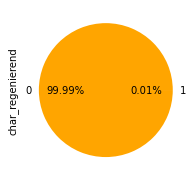

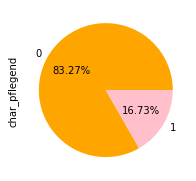

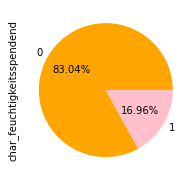

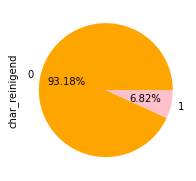

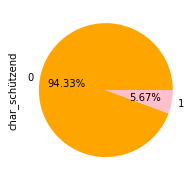

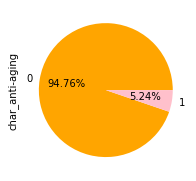

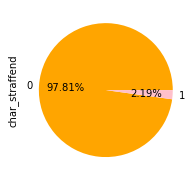

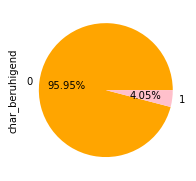

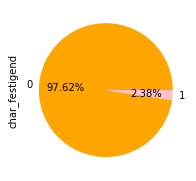

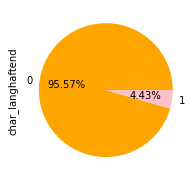

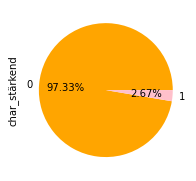

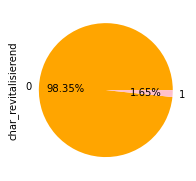

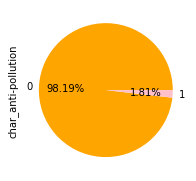

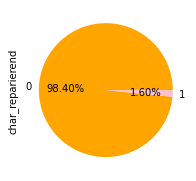

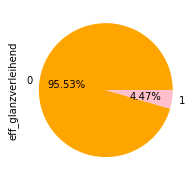

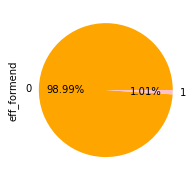

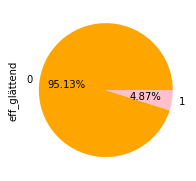

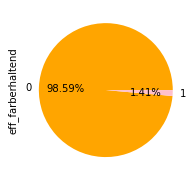

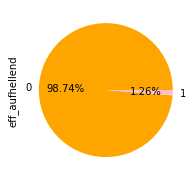

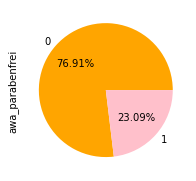

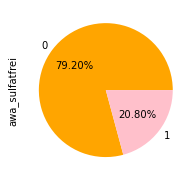

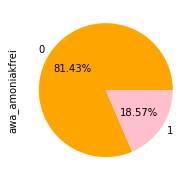

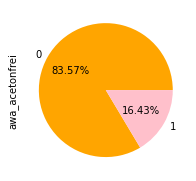

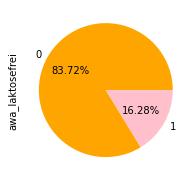

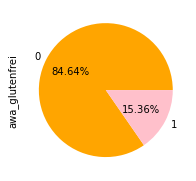

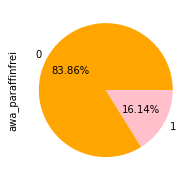

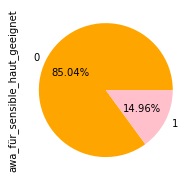

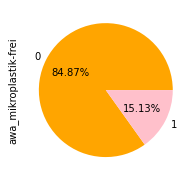

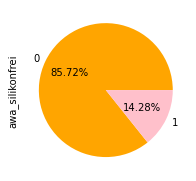

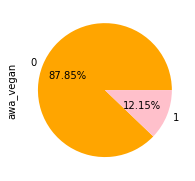

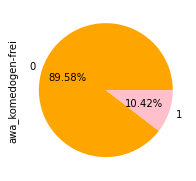

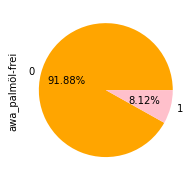

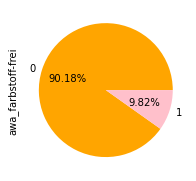

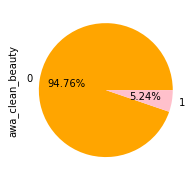

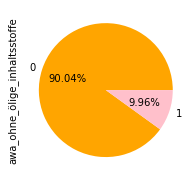

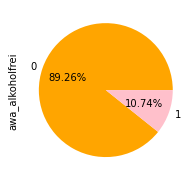

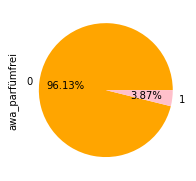

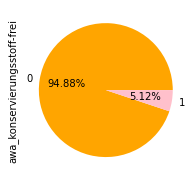

In [19]:
columns = ['char_regenierend',
       'char_pflegend', 'char_feuchtigkeitsspendend', 'char_reinigend',
       'char_schützend', 'char_anti-aging', 'char_straffend',
       'char_beruhigend', 'char_festigend', 'char_langhaftend', 'char_stärkend',
       'char_revitalisierend', 'char_anti-pollution', 'char_reparierend',
       'eff_glanzverleihend', 'eff_formend', 'eff_glättend',
       'eff_farberhaltend', 'eff_aufhellend', 
       'awa_parabenfrei', 'awa_sulfatfrei', 'awa_amoniakfrei',
       'awa_acetonfrei', 'awa_laktosefrei', 'awa_glutenfrei',
       'awa_paraffinfrei', 'awa_für_sensible_haut_geeignet',
       'awa_mikroplastik-frei', 'awa_silikonfrei', 'awa_vegan',
       'awa_komedogen-frei', 'awa_palmöl-frei', 'awa_farbstoff-frei',
       'awa_clean_beauty', 'awa_ohne_ölige_inhaltsstoffe', 'awa_alkoholfrei',
       'awa_parfümfrei', 'awa_konservierungsstoff-frei']


for col in columns:
    df[col].value_counts().plot(kind='pie', autopct = "%.2f%%", colors = ['orange', 'pink', 'yellow'], figsize=(3, 6))
    plt.show()

- Droping columns with under 5% values of 1 in the dataset 

In [20]:
df = df.drop(['eff_verdichtend', 'eff_verlängernd', 'char_regenierend', 'char_straffend', 'char_beruhigend', 
              'char_festigend', 'char_langhaftend',  'char_stärkend', 'char_revitalisierend', 'char_anti-pollution',
              'char_reparierend', 'eff_glanzverleihend', 'eff_formend','eff_farberhaltend', 'eff_aufhellend', 'awa_parfümfrei'
], axis=1)

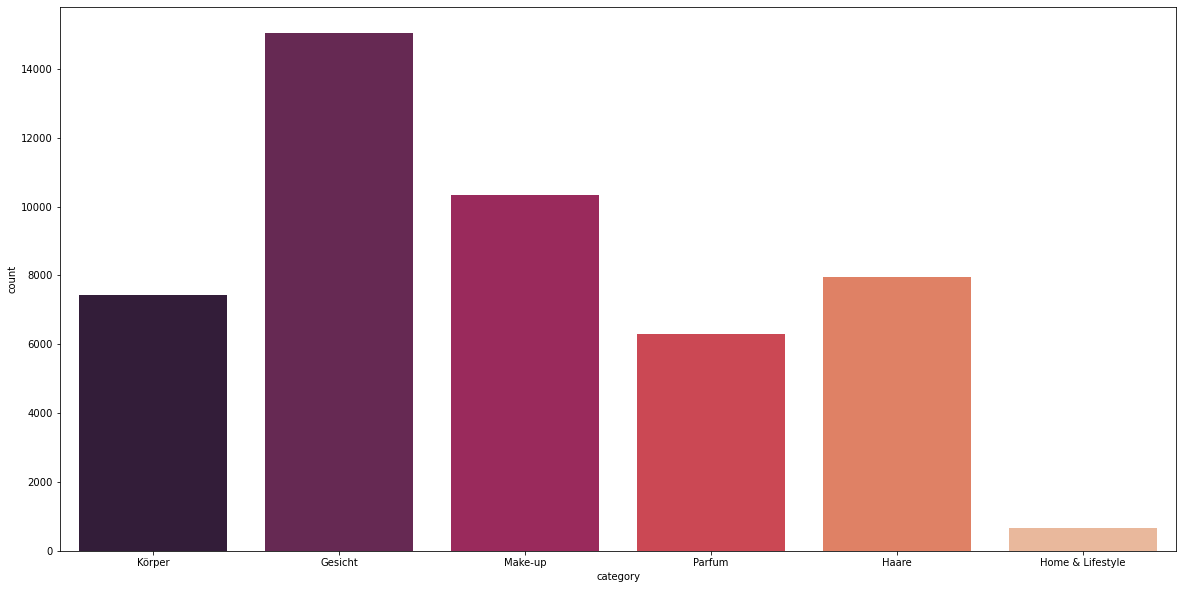

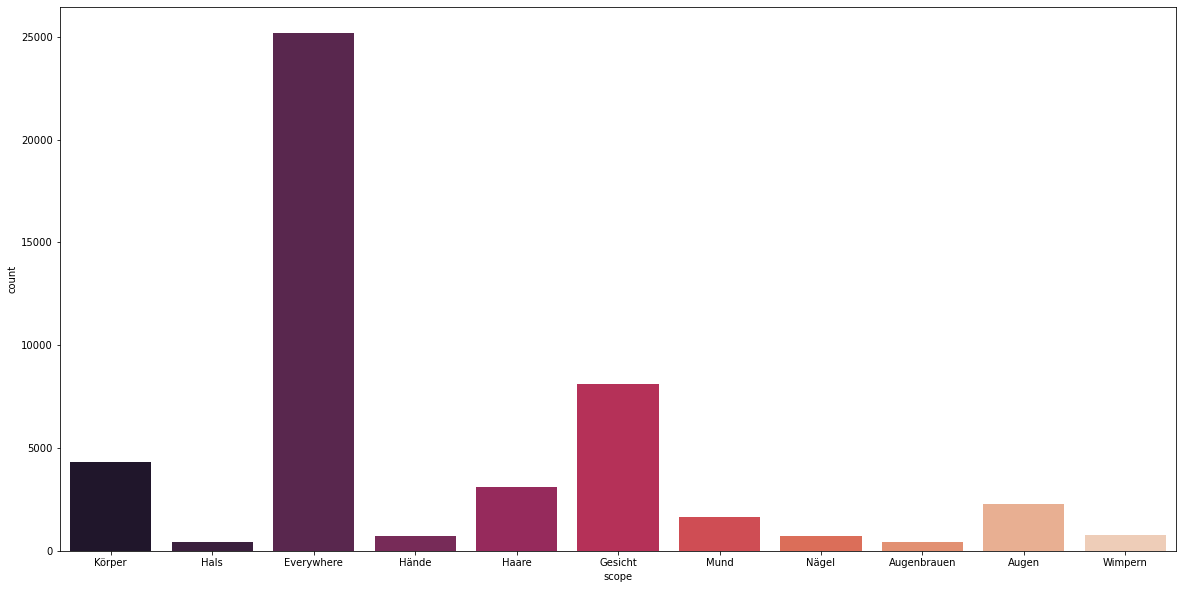

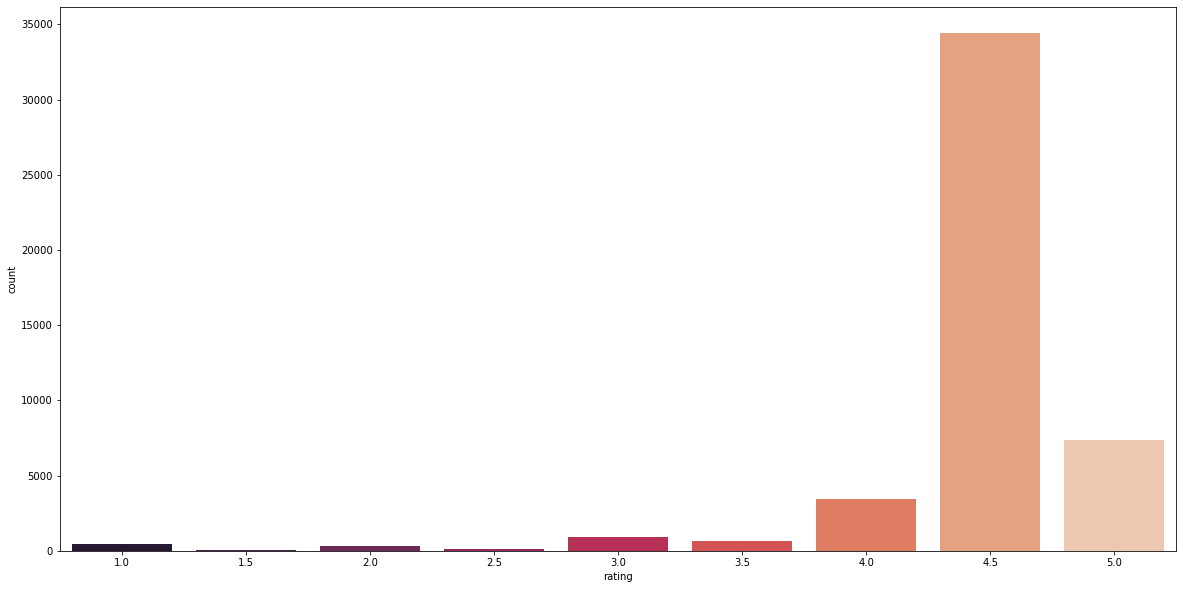

In [21]:
plot_list = ["category", "scope", "rating"]
for i in plot_list: 
    plt.figure(figsize=(20,10))
    sns.countplot(df[i], palette = 'rocket')
    plt.show()

In [22]:
columns = ['scope', 'category']
for i in columns: 
    plt.figure(figsize=(40,10))
    sns.countplot(x = i, hue = 'rating', data = data, palette = "Set2")
    plt.show()

NameError: name 'data' is not defined

<Figure size 2880x720 with 0 Axes>

In [ ]:
columns = ['category', 'scope', 'rating', 'brand']
for col in columns:
    df[col].value_counts().plot(kind='pie', autopct = "%.2f%%", colors = ['orange', 'pink', 'yellow'], figsize=(10, 20))
    plt.show()

In [ ]:
columns = ['type']
for col in columns:
    data[col].value_counts().plot(kind='pie', autopct='%1.0f%%',  colors = ['orange', 'pink', 'yellow'], figsize=(15, 50))
    plt.show()

**Findings in categorical columns**
- The **rating** 4.5. is over all the most frequent value with 72% and after this the rating 5 (with 15%). This distribution is also evident across all categories and scopes.
- The most frequent **category** is face with 15000 counts and 31.5 % in the datasat. The least freuqent category is Home & Lifestyle with 750 counts and only        1.3 %. 
- The most freuqent **type** of product is the hair product type with 10%. The other types have 200-2900 counts and 0-6 %.
- Most of the products have not one specific **scope** and are useble for every scope ("Everywhere" : 25.000, 53 %). The neck is the least frequent scope with 0.9%. 
- Because of over 1200 different values in the **brand** column cut the brands with less than 200 counts. 
- After this most of the brand values are Other_brands (70%) or l'oréal paris (20%), because all the NaN values take this brand. 
- Droped 16 **effect** (eff), **product_award** (awa) and **characteristic** (char) columns because there are only < 5% differnt values (0,1). 

## 3. DATA PROCESSING + FEATURE ENGINEERIN

### 3.1. CORRELATION NUMERICAL COLUMNS

Find features with correlation greater than 0.95 and drop them from dataframe 

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)
print(to_drop)

There is no numerical data that have to be drop, because the correlation is to high. 

### 3.2. CORRELATION CATEGORICAL COLUMNS

In [ ]:
chi_square_execute(df, columns=['brand', 'product', 'category', 'type', 'scope', 'rating',
       'char_pflegend', 'char_feuchtigkeitsspendend', 'char_reinigend', 'char_schützend', 'char_anti-aging', 
       'eff_glättend',  'awa_parabenfrei', 'awa_sulfatfrei', 'awa_amoniakfrei', 'awa_acetonfrei', 'awa_glutenfrei', 
       'awa_paraffinfrei', 'awa_für_sensible_haut_geeignet', 'awa_mikroplastik-frei','awa_silikonfrei', 'awa_vegan',
       'awa_komedogen-frei', 'awa_palmöl-frei', 'awa_farbstoff-frei', 'awa_clean_beauty', 'awa_ohne_ölige_inhaltsstoffe',
       'awa_alkoholfrei', 'awa_konservierungsstoff-frei'])

There are no categorical which failed to reject the null hypothesis and have no relationship to the target column "rating". 

### 3.3. APPLY BOXCOX TRANSFORMATION

I droped the poduct column, because these column have almost unique values.

In [25]:
data = df
data.shape
data = data.drop(["product", "item_nb"], axis=1) 

In [23]:
data[['size', 'price', 'age', 'number_rating']], _ci = boxcox_transform(num)
data

NameError: name 'data' is not defined

### 3.4. DEAL WITH OUTLIERS

In [ ]:
for col in data.select_dtypes(np.number):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(data[col], ax=axes[0])
    sns.boxplot(data[col], ax=axes[1])
    plt.show()

In [24]:
data = remove_outliers(data, threshold=1.5, in_columns= ["number_rating", "price", "size"])
data.shape

NameError: name 'data' is not defined

In [ ]:
data.to_csv('df_explored')

### 3.5. TRAIN / TEST SPLIT

In [89]:
to_num_columns =  [  
       'size', 'price', 'age', 'number_rating', 'rating', 'char_pflegend', 'char_feuchtigkeitsspendend', 'char_reinigend', 'char_schützend', 'char_anti-aging', 
       'eff_glättend',  'awa_parabenfrei', 'awa_sulfatfrei', 'awa_amoniakfrei', 'awa_acetonfrei', 'awa_glutenfrei', 
       'awa_paraffinfrei', 'awa_für_sensible_haut_geeignet', 'awa_mikroplastik-frei','awa_silikonfrei', 'awa_vegan',
       'awa_komedogen-frei', 'awa_palmöl-frei', 'awa_farbstoff-frei', 'awa_clean_beauty', 'awa_ohne_ölige_inhaltsstoffe',
       'awa_alkoholfrei', 'awa_konservierungsstoff-frei']

data[to_num_columns] = data[to_num_columns].astype('int64')

In [34]:
# data.reset index?
# y_train = y_train.reset_index(drop=True)

In [90]:
data.isnull().values.any()

False

In [106]:
X = data.drop('rating', axis =1)
y = data['rating']

In [107]:
y.value_counts()

4    31657
5     5991
3     1164
1      374
2      311
Name: rating, dtype: int64

To avoid that the split of the data is done randomly and maybe in on of the datasets are no values of 1 or 2 i used the stratify paramether.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=data['rating'])

### 3.6. STANDARDIZE NUMERICAL COLUMNS

In [109]:
X_test_cat = X_test.select_dtypes(exclude=np.number)
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_test_cat)
encoded_test = encoder.transform(X_test_cat).toarray()

X_train_cat = X_train.select_dtypes(exclude=np.number)
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
encoded_train = encoder.transform(X_train_cat).toarray()

In [110]:
encoded_train = pd.DataFrame(data=encoded_train)
#encoded_train.drop(columns=encoded_train.columns[-1], axis=1, inplace=True)
encoded_train.shape

(31597, 79)

In [111]:
encoded_test = pd.DataFrame(data=encoded_test)
#encoded_test.drop(columns=encoded_test.columns[-1], axis=1, inplace=True)
encoded_test.shape

(7900, 79)

6030 rows are correct 

### 3.7. ENDCODE CATEGORICAL COLUMNS

In [112]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

transformer = StandardScaler().fit(X_test_num)
X_test_n = transformer.transform(X_test_num)
X_test_n = pd.DataFrame(data=X_test_n)

transformer = StandardScaler().fit(X_train_num)
X_train_n = transformer.transform(X_train_num)
X_train_n = pd.DataFrame(data=X_train_n)

### 3.8. CONCAT ENDCODED CATEGORICAL + STANDARDUZE NUMERCIAL DATA 

In [113]:
X_train  = pd.concat([X_train_n, encoded_train], axis = 1) 
X_test  = pd.concat([X_test_n, encoded_test], axis = 1) 

In [115]:
new_columns =  []
for i in range(106): 
    new_columns.append(i)
X_train.columns = new_columns

## MODEL EVALUATION

### 4.1. KNEIGHBORS CLASSIFIER

Choose the best k value

In [116]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [117]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.8339240506329114,
 0.829620253164557,
 0.839746835443038,
 0.8481012658227848,
 0.8505063291139241,
 0.8478481012658228,
 0.85,
 0.8456962025316456,
 0.8473417721518988,
 0.8469620253164557]

Text(0, 0.5, 'Accuracy')

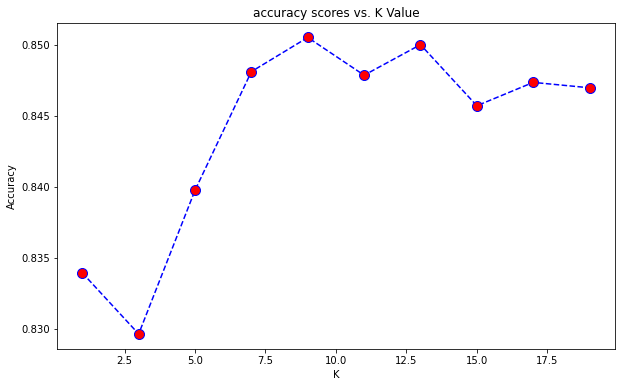

In [119]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [120]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print("accuracy score:", score)

accuracy score: 0.8505063291139241


<AxesSubplot:>

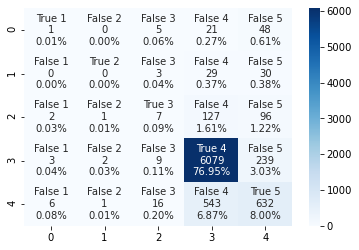

In [121]:
#y_pred = model.predict(X_test)
predictions = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True 1', 'False 2', 'False 3', 'False 4','False 5', 
               'False 1',  'True 2', 'False 3','False 4', 'False 5',
               'False 1', 'False 2','True 3', 'False 4',  'False 5',
               'False 1', 'False 2', 'False 3','True 4', 'False 5',
               'False 1', 'False 2','False 3', 'False 4','True 5']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [122]:
report_KNN_9 = classification_report(y_test, y_pred)
print(report_KNN_9)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        62
           3       0.00      0.00      0.00       233
           4       0.89      0.96      0.92      6332
           5       0.59      0.50      0.54      1198

    accuracy                           0.85      7900
   macro avg       0.30      0.29      0.29      7900
weighted avg       0.80      0.85      0.82      7900



**Conclusion KNeighbors Classifier k = 9**\
The precision of 4 is very high for this model (0.76%), but the precision for the other ratings is pretty low. The result is based on the high number of 4 values. Next step is to oversample the minority with SMOTE.

### 4.2. KNEIGHBORS CLASSIFIER WITH SMOTE

In [123]:
print(round(data['rating'].value_counts()/len(data), 2))

4    0.80
5    0.15
3    0.03
1    0.01
2    0.01
Name: rating, dtype: float64


In [125]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

1    25325
2    25325
3    25325
4    25325
5    25325
Name: rating, dtype: int64

In [126]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.8175949367088607,
 0.7930379746835443,
 0.7721518987341772,
 0.7591139240506329,
 0.7473417721518988,
 0.7374683544303797,
 0.729873417721519,
 0.7225316455696202,
 0.7140506329113924,
 0.7084810126582278]

Text(0, 0.5, 'Accuracy')

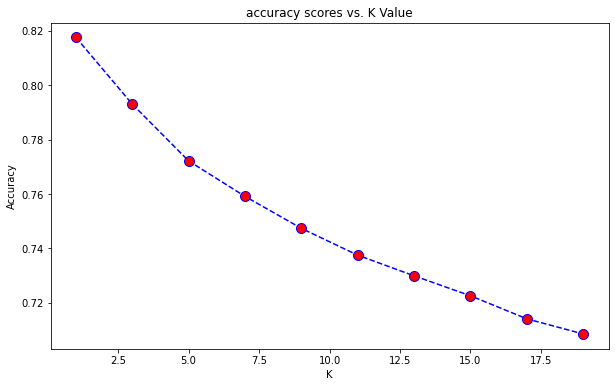

In [127]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [130]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
print("accuracy_score k=5:", metrics.accuracy_score(y_test, y_pred))

accuracy_score k=5: 0.7721518987341772


[[  15    5   13    5   37]
 [   4   13   10    5   30]
 [  21   20   77   25   90]
 [  66   62  270 5256  678]
 [  85   80  152  142  739]]


<AxesSubplot:>

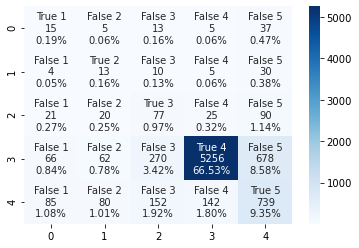

In [131]:
print(confusion_matrix(y_test, y_pred))
    
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True 1', 'False 2', 'False 3', 'False 4','False 5', 
               'False 1',  'True 2', 'False 3','False 4', 'False 5',
               'False 1', 'False 2','True 3', 'False 4',  'False 5',
               'False 1', 'False 2', 'False 3','True 4', 'False 5',
               'False 1', 'False 2','False 3', 'False 4','True 5']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [132]:
report_KNN_SMOTE_2 = classification_report(y_test, y_pred)
print(report_KNN_SMOTE_2)

              precision    recall  f1-score   support

           1       0.08      0.20      0.11        75
           2       0.07      0.21      0.11        62
           3       0.15      0.33      0.20       233
           4       0.97      0.83      0.89      6332
           5       0.47      0.62      0.53      1198

    accuracy                           0.77      7900
   macro avg       0.35      0.44      0.37      7900
weighted avg       0.85      0.77      0.80      7900



In [133]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
print("accuracy_score k=8:", metrics.accuracy_score(y_test, y_pred))

accuracy_score k=8: 0.7564556962025316


[[  20    3   15    2   35]
 [   6   12   12    3   29]
 [  27   17   85   17   87]
 [  87   82  368 5141  654]
 [  97   66  189  128  718]]


<AxesSubplot:>

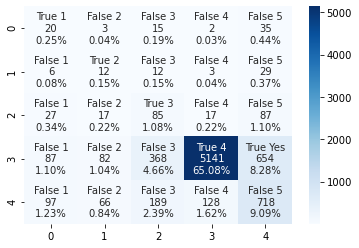

In [134]:
print(confusion_matrix(y_test, y_pred))
    
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True 1', 'False 2', 'False 3', 'False 4','False 5', 
               'False 1',  'True 2', 'False 3','False 4', 'False 5',
               'False 1', 'False 2','True 3', 'False 4',  'False 5',
               'False 1', 'False 2', 'False 3','True 4', 'True Yes',
               'False 1', 'False 2','False 3', 'False 4','False 5']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [135]:
report_KNN_SMOTE_8 = classification_report(y_test, y_pred)
print(report_KNN_SMOTE_8)

              precision    recall  f1-score   support

           1       0.08      0.27      0.13        75
           2       0.07      0.19      0.10        62
           3       0.13      0.36      0.19       233
           4       0.97      0.81      0.88      6332
           5       0.47      0.60      0.53      1198

    accuracy                           0.76      7900
   macro avg       0.34      0.45      0.37      7900
weighted avg       0.86      0.76      0.80      7900



### 4.3. LOGISTIC REGRESSION 

In [140]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.8691139240506329

<AxesSubplot:>

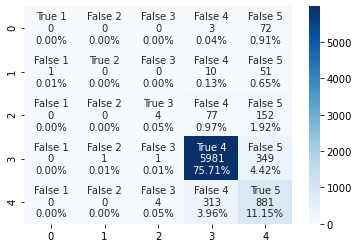

In [141]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix
group_names = ['True 1', 'False 2', 'False 3', 'False 4','False 5', 
               'False 1',  'True 2', 'False 3','False 4', 'False 5',
               'False 1', 'False 2','True 3', 'False 4',  'False 5',
               'False 1', 'False 2', 'False 3','True 4', 'False 5',
               'False 1', 'False 2','False 3', 'False 4','True 5']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [142]:
report_lr = classification_report(y_test, predictions)
print(report_lr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        62
           3       0.44      0.02      0.03       233
           4       0.94      0.94      0.94      6332
           5       0.59      0.74      0.65      1198

    accuracy                           0.87      7900
   macro avg       0.39      0.34      0.33      7900
weighted avg       0.85      0.87      0.85      7900



### 4.4. LOGISTIC REGRESSION - WEIGHTS

In [143]:
classes = np.unique(y_train)
cw = class_weight.compute_class_weight('balanced', classes, y_train)
weights = dict(zip(classes,cw))

In [144]:
classification = LogisticRegression(random_state=42, max_iter=10000, class_weight=weights) #'balanced')
classification.fit(X_train, y_train)
print("classification score:", classification.score(X_test, y_test))

classification score: 0.7729113924050633


<AxesSubplot:>

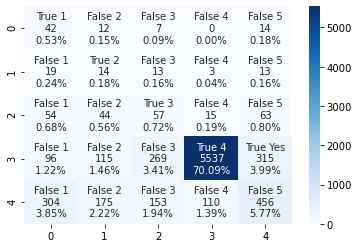

In [145]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True 1', 'False 2', 'False 3', 'False 4','False 5', 
               'False 1',  'True 2', 'False 3','False 4', 'False 5',
               'False 1', 'False 2','True 3', 'False 4',  'False 5',
               'False 1', 'False 2', 'False 3','True 4', 'True Yes',
               'False 1', 'False 2','False 3', 'False 4','False 5']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [146]:
report_weights = classification_report(y_test, predictions)
print(report_weights)

              precision    recall  f1-score   support

           1       0.08      0.56      0.14        75
           2       0.04      0.23      0.07        62
           3       0.11      0.24      0.16       233
           4       0.98      0.87      0.92      6332
           5       0.53      0.38      0.44      1198

    accuracy                           0.77      7900
   macro avg       0.35      0.46      0.35      7900
weighted avg       0.87      0.77      0.81      7900



## 5. MODEL CONCLUSIONS

In order to judge which model works best, the following indicators provide the most insight
- accuracy score
- f1 score weighted avg 
- precision 1 / 2 / 3 / 4 / 5
- recall 1 / 2 / 3 / 4 / 5

Here is an overview of the indicators per model:

|               model               | accuracy score | f1 score weighted avg   | 
|:---------------------------------:|----------------|:-----------------------:|
|    KNeighbors Classifier k = 9    | 0.85           | 0.82                    |
| KNeighbors Classifier SMOTE k = 5 | 0.77           | 0.80                    | 
| KNeighbors Classifier SMOTE k = 8 | 0.76           | 0.80                    |
|        Logistic Regression        | 0.87           | 0.85                    |
|   Logistic Regression - Weights   | 0.77           | 0.81                    | 

|               model               | recall 1       | recall 2                | recall 3   | recall 4  | recall 5      |
|:---------------------------------:|----------------|:-----------------------:|------------|-----------|---------------|
|    KNeighbors Classifier k = 9    | 0.00           | 0.00                    | 0.00       | 0.92      | 0.54          | 
| KNeighbors Classifier SMOTE k = 5 | 0.20           | 0.21                    | 0.33       | 0.83      | 0.62          | 
| KNeighbors Classifier SMOTE k = 8 | 0.27           | 0.19                    | 0.36       | 0.81      | 0.60          |
|        Logistic Regression        | 0.00           | 0.00                    | 0.02       | 0.94      | 0.74          | 
|   Logistic Regression - Weights   | 0.56           | 0.23                    | 0.24       | 0.87      | 0.38          |

|               model               | precision 1    | precision 2             | precision 3|precision 4| precision 5   | 
|:---------------------------------:|----------------|:-----------------------:|------------|-----------|---------------|
|    KNeighbors Classifier k = 9    | 0.00           | 0.00                    | 0.00       | 0.96      | 0.50          | 
| KNeighbors Classifier SMOTE k = 5 | 0.08           | 0.07                    | 0.15       | 0.97      | 0.47          |
| KNeighbors Classifier SMOTE k = 8 | 0.08           | 0.07                    | 0.13       | 0.97      | 0.47          |
|        Logistic Regression        | 0.00           | 0.00                    | 0.44       | 0.94      | 0.59          | 
|   Logistic Regression - Weights   | 0.08           | 0.04                    | 0.11       | 0.98      | 0.53          | 

These findings lead to the following most notable conclusions per model.

**Conclusion KNeighbors Classifier k = 9**\
The precision of 4 is very high for this model (0.96) and for the rating for it is also ok (0.50), but the precision for the other ratings (1-3) are 0. The result is based on the high number of 4 and relativ high number of 5 values. Next step is to oversample the minority with SMOTE.

**Conclusion KNeighbors Classifier - SMOTE**\
Even when the accuracy score is less high with the SMOTE technique (Before SMOTE: 0.85; After SMOTE: 0,77; 0,76), the model have higher recall scores for the ratings 1 to 3 (before: 0, with SMOTE: 0.19-0.36). 

**Conclusion Logistic Regression**\
This model have the highest recall when it comes to the rating 4, but based on the imbalanced data the recall for the ratings 1-3 is very low with a recall of 0.0-0.2.

**Conclusion Logistic Regression - Weights**\
Even if the accuracy score of 0.77 with weighted balanced is less than before, the prediction is better for the recall of 1-3  (recall: 0.23-0.56). This model is capable of recognizing any rating and is a good base to improvment. 

## 6. WRAP UP AND RECOMMENDED NEXT STEPS

- Logistic Regression with changed class weights fits best for this dataset.
- Most frequent category is face with 15000 counts in the datasat. The least freuqent category is Home & Lifestyle with 750 counts. 
- The most freuqent type of product is the hair product type, but the other types are distributed between 2900 and 200 counts.
- Most of the products have not one specific scope and are useble for every scope ("Everywhere" : 25.000). The neck is the least frequent scope. 
- There were some binary columns with less than 1% different values (0,1). These columns I would reccomend to drop from the beginning. 
- Next step to evaluate the logistic regression model with balanced weights: Cut the variables which do not improve the prediction and improve the weight/balance
- For the next scraping process I would recommend to scrape only products with a high number and similiar count of ratings. (The number of ratings reaching from 1 to +16000.) 